In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [3]:
sales = pd.read_csv(r"house_data.csv")

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Exploration

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

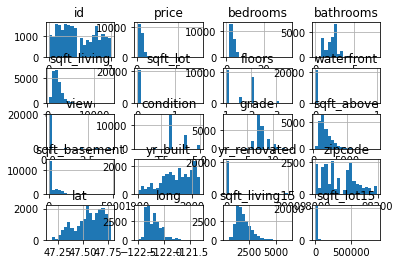

In [6]:
sales.hist(bins=20)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

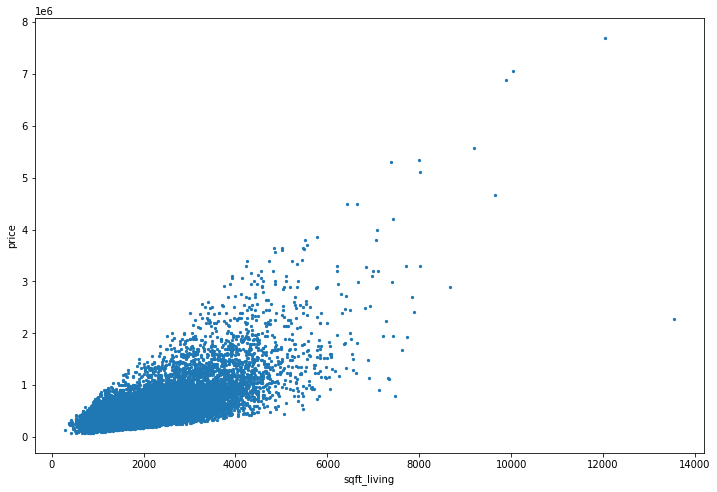

In [7]:
sales.plot.scatter(x = 'sqft_living', y = 'price', figsize=(12,8), s=5)

## Splitting into training and test set

In [8]:
training_set, test_set = train_test_split(sales, test_size=0.2, shuffle=False, random_state = 0)

# Regression model to predict 'price' using 'sqft_living'

In [9]:
reg = LinearRegression(fit_intercept=True)

In [10]:
reg.fit(sales.loc[:, ['sqft_living']], sales['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate using test data

In [11]:
print(test_set['price'].mean())

567447.5727504048


## RMSE and max_error metrics

In [12]:
y_pred = reg.predict(test_set.loc[:, ['sqft_living']])

In [13]:
RMSE_basic = np.sqrt(metrics.mean_squared_error(test_set['price'], y_pred))
print('Root Mean Squared Error of the predictions with one feature is : ', RMSE_basic)

Root Mean Squared Error of the predictions with one feature is :  263852.31026702834


In [14]:
metrics.max_error(test_set['price'], y_pred)

2297344.8881757

## Co-efficients

In [15]:
print(reg.coef_)

[280.62356663]


In [16]:
print(reg.intercept_)

-43580.740327085136


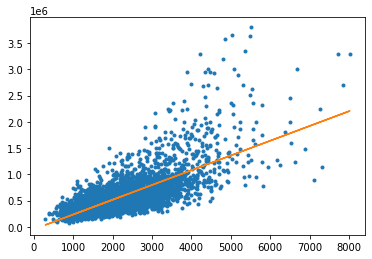

In [17]:
plt.plot(test_set['sqft_living'], test_set['price'], '.',
        test_set['sqft_living'], y_pred, '-')

# Regression model to predict 'price' using 6 basic parameters

In [18]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [19]:
sales[my_features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


In [20]:
reg_1 = LinearRegression(fit_intercept=True)

In [21]:
reg_1.fit(sales.loc[:, my_features], sales['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate using test data

## RMSE and max_error metrics

In [22]:
y_pred_1 = reg_1.predict(test_set.loc[:, my_features])

In [23]:
RMSE_advanced = np.sqrt(metrics.mean_squared_error(test_set['price'], y_pred_1))
print('Root Mean Squared Error of the predictions with advanced features is : ', RMSE_advanced)

Root Mean Squared Error of the predictions with advanced features is :  255648.11680947174


In [24]:
metrics.max_error(test_set['price'], y_pred_1)

2295969.8883853927

In [25]:
sales_1 = sales.loc[:, ['price', 'zipcode']]

<AxesSubplot:title={'center':'price'}, xlabel='[zipcode]'>

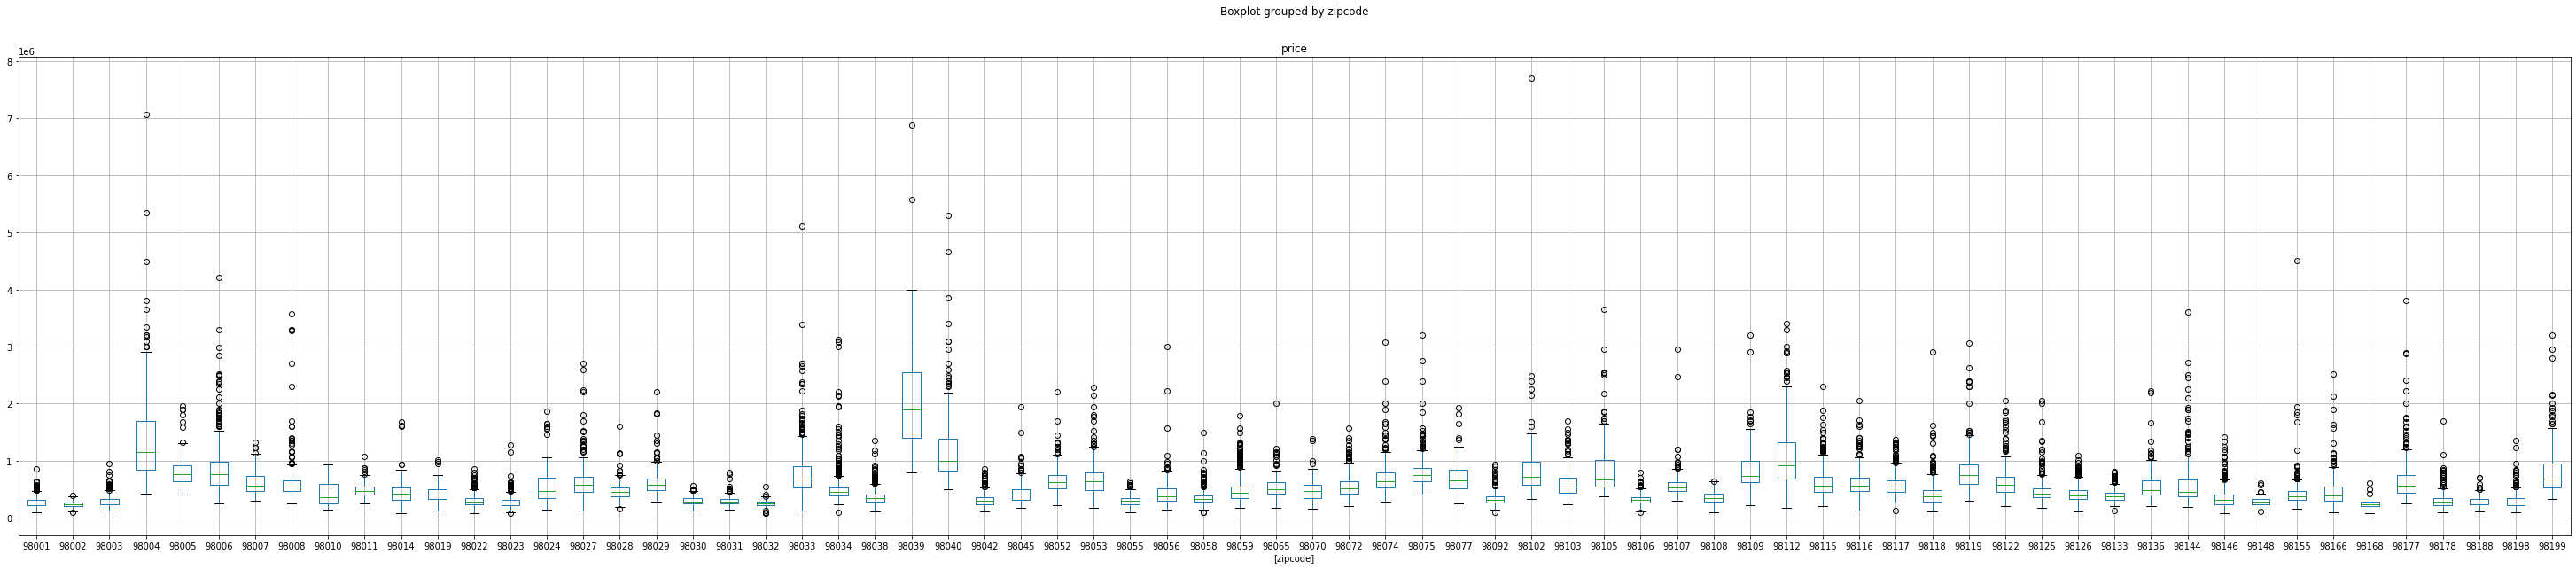

In [26]:
sales_1.boxplot(by = 'zipcode', figsize = (50,10))

In [27]:
print(reg_1.coef_)

[-5.79807957e+04  1.28437097e+04  3.16184918e+02 -3.01798568e-01
 -4.20215261e+03  5.68388159e+02]


In [28]:
print(reg_1.intercept_)

-55684763.11505646


# Apply learned models to make predictions

# House 1

In [29]:
house1 = sales[sales['id']== 5309101200]

In [30]:
print(house1['price'])

1054    620000
Name: price, dtype: int64


In [31]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [32]:
reg.predict(house1.loc[:, ['sqft_living']])   # Predict using one feature.

array([629915.81959366])

In [33]:
reg_1.predict(house1.loc[:, my_features])     # Predict using 6 features.

array([631679.0089042])

# House 2

In [34]:
house2 = sales[sales['id']== 1925069082]

In [35]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [36]:
print(house2['price'])

1361    2200000
Name: price, dtype: int64


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [37]:
reg.predict(house2.loc[:, ['sqft_living']])   # Predict using one feature.

array([1258512.60885303])

In [38]:
reg_1.predict(house2.loc[:, my_features])     # Predict using 6 features.

array([1263356.43295371])

# Prediction of price of my future house

In [39]:
my_house = {'bedrooms':[20], 
              'bathrooms':[10], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[5], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [40]:
my_house_df = pd.DataFrame.from_dict(my_house)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [41]:
reg.predict(my_house_df.loc[:, ['sqft_living']])   # Predict using one feature.

array([13987597.59135518])

In [42]:
reg_1.predict(my_house_df.loc[:, my_features])     # Predict using 6 features.

array([14728595.28299817])